In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rhanalyze
from rhanalyze.satlas import satlas

In [2]:
RHF1D_DIR = '/home/han/Source/rh_v2/rhf1d/'

mdl_B = rhanalyze.rhout(RHF1D_DIR + 'run_Fontenla_B')
mdl_F = rhanalyze.rhout(RHF1D_DIR + 'run_Fontenla_F')
mdl_P = rhanalyze.rhout(RHF1D_DIR + 'run_Fontenla_P')
mdl_Q = rhanalyze.rhout(RHF1D_DIR + 'run_Fontenla_Q')
mdl_S = rhanalyze.rhout(RHF1D_DIR + 'run_Fontenla_S')

fal_C    = rhanalyze.rhout(RHF1D_DIR + 'run_FALC')
kur_5750 = rhanalyze.rhout(RHF1D_DIR + 'run_Kurucz_T5750')

In [10]:
fts = satlas()

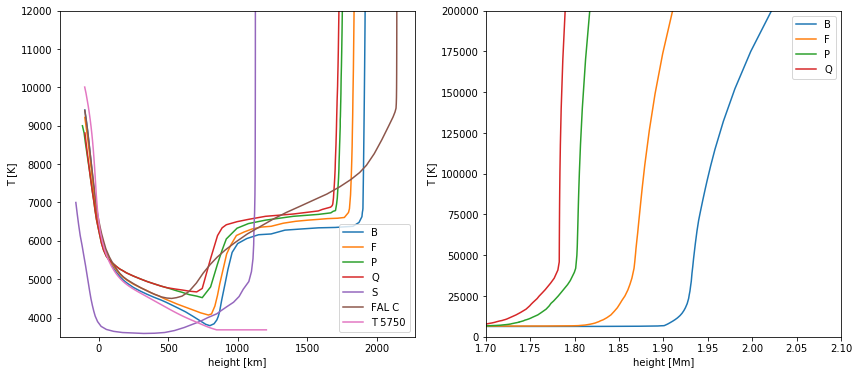

In [11]:
KM_TO_M = 1.0E3
MM_TO_M = 1.0E6

plt.figure(figsize=[14,6])

plt.subplot(121)
plt.plot(mdl_B.geometry.height/ KM_TO_M, mdl_B.atmos.T, label='B')
plt.plot(mdl_F.geometry.height/ KM_TO_M, mdl_F.atmos.T, label='F')
plt.plot(mdl_P.geometry.height/ KM_TO_M, mdl_P.atmos.T, label='P')
plt.plot(mdl_Q.geometry.height/ KM_TO_M, mdl_Q.atmos.T, label='Q')
plt.plot(mdl_S.geometry.height/ KM_TO_M, mdl_S.atmos.T, label='S')
plt.plot(fal_C.geometry.height/ KM_TO_M, fal_C.atmos.T, label='FAL C')
plt.plot(kur_5750.geometry.height/ KM_TO_M, kur_5750.atmos.T, label='T 5750')

plt.xlabel('height [km]')
plt.ylabel('T [K]')
plt.ylim([3.5E3, 12.0E3])
plt.legend()

plt.subplot(122)
plt.plot(mdl_B.geometry.height/ MM_TO_M, mdl_B.atmos.T, label='B')
plt.plot(mdl_F.geometry.height/ MM_TO_M, mdl_F.atmos.T, label='F')
plt.plot(mdl_P.geometry.height/ MM_TO_M, mdl_P.atmos.T, label='P')
plt.plot(mdl_Q.geometry.height/ MM_TO_M, mdl_Q.atmos.T, label='Q')

plt.xlabel('height [Mm]')
plt.ylabel('T [K]')
plt.xlim([1.7, 2.1])
plt.ylim([0.0, 2.0E5])
plt.legend()

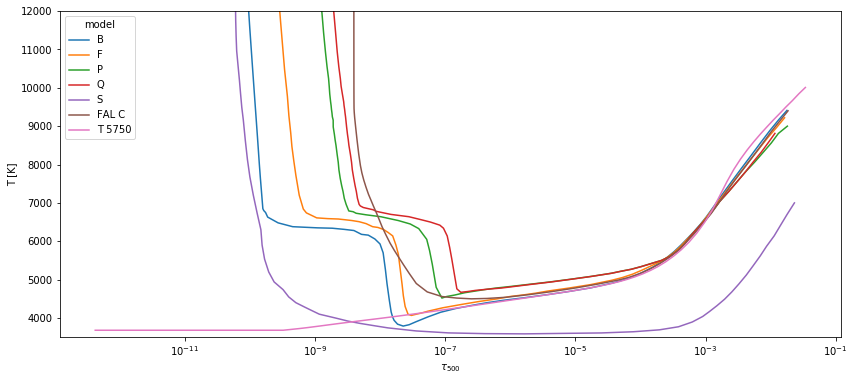

In [12]:
plt.figure(figsize=[14, 6])

plt.plot(mdl_B.geometry.tau500/ KM_TO_M, mdl_B.atmos.T, label='B')
plt.plot(mdl_F.geometry.tau500/ KM_TO_M, mdl_F.atmos.T, label='F')
plt.plot(mdl_P.geometry.tau500/ KM_TO_M, mdl_P.atmos.T, label='P')
plt.plot(mdl_Q.geometry.tau500/ KM_TO_M, mdl_Q.atmos.T, label='Q')
plt.plot(mdl_S.geometry.tau500/ KM_TO_M, mdl_S.atmos.T, label='S')
plt.plot(fal_C.geometry.tau500/ KM_TO_M, fal_C.atmos.T, label='FAL C')
plt.plot(kur_5750.geometry.tau500/ KM_TO_M, kur_5750.atmos.T, label='T 5750')

plt.xlabel(r'$\tau_{500}$')
plt.xscale('log')
plt.ylabel('T [K]')
plt.ylim([3.5E3, 12.0E3])
plt.legend(title='model')

plt.show()

In [13]:
print("number of ACTIVE atoms = ", mdl_B.Natom)
for n in range(mdl_B.Natom):
    print(mdl_B.atoms[n].atomID)

print("\nLine transitions in calcium:")
for kr in range(mdl_B.atoms[0].Nline):
    print(kr, mdl_B.atoms[0].transition[kr].lambda0)

print("\nLine transitions in hydrogen:")
for kr in range(mdl_B.atoms[1].Nline):
    print(kr, mdl_B.atoms[1].transition[kr].lambda0)
    
print("\nLine transitions in sodium:")
for kr in range(mdl_B.atoms[2].Nline):
    print(kr, mdl_B.atoms[2].transition[kr].lambda0)

number of ACTIVE atoms =  3
CA
H
NA

Line transitions in calcium:
0 396.8468382188923
1 393.3663282700125
2 866.2135336747579
3 849.8018021807793
4 854.2085677754852

Line transitions in hydrogen:
0 121.56841096386113
1 102.57334047695107
2 97.25472664293042
3 94.97532294174133
4 656.2875566782157
5 486.1376811662886
6 434.05085125417577
7 1875.1146355905196
8 1281.8165186735582
9 4051.179079914822

Line transitions in sodium:
0 589.5921272885615
1 588.9948313878823
2 342.6861409894241
3 330.2571931487577
4 255.37729170709778
5 1138.1443685635834
6 818.3271769598364
7 568.2637611678031
8 450.53049528410975
9 1140.3767479956075
10 819.4806017674873
11 568.8197312623322
12 450.87988963802945
13 2206.548148050518
14 9106.13867666741
15 1846.5352174677769
16 1267.745030553323
17 1083.3780184598425
18 2336.885316305953
19 1126.4153546854347
20 3983.023191659788
21 2595.367198552028
22 2174.6161464244287
23 4044.5396367706453
24 2621.3468153707713
25 2192.825572172976
26 7449.549275317713
27

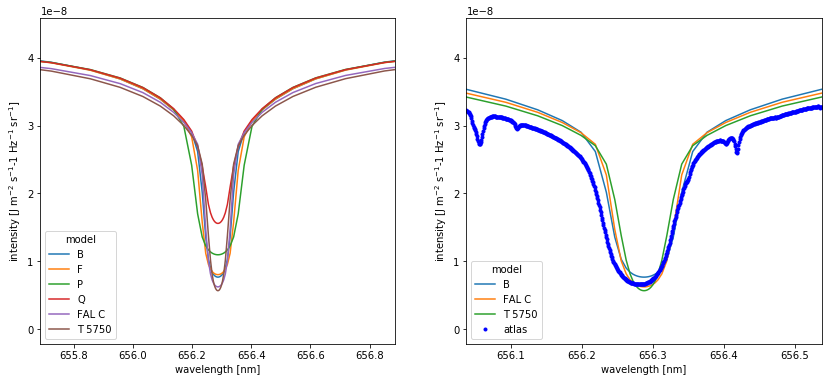

In [14]:
plt.figure(figsize=[14, 6])

lambda0 = mdl_B.atoms[1].transition[4].lambda0
Halpha_obs = fts.nmsiatlas(lambda0-2.0, lambda0+2.0)

plt.subplot(121)
plt.plot(mdl_B.spectrum.waves, mdl_B.rays[0].I, label='B')
plt.plot(mdl_F.spectrum.waves, mdl_F.rays[0].I, label='F')
plt.plot(mdl_P.spectrum.waves, mdl_P.rays[0].I, label='P')
plt.plot(mdl_Q.spectrum.waves, mdl_Q.rays[0].I, label='Q')
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(kur_5750.spectrum.waves, kur_5750.rays[0].I, label='T 5750')

plt.xlim([lambda0-0.6, lambda0+0.6])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')

plt.legend(title='model')

plt.subplot(122)
plt.plot(mdl_B.spectrum.waves, mdl_B.rays[0].I, label='B')
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(kur_5750.spectrum.waves, kur_5750.rays[0].I, label='T 5750')

plt.plot(Halpha_obs[0], Halpha_obs[1], "b.", label='atlas')
plt.xlim([lambda0-0.25, lambda0+0.25])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')
plt.legend(title='model')
plt.show()

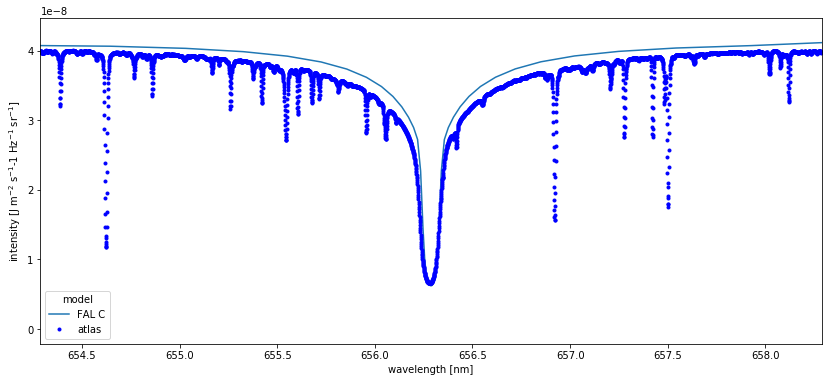

In [15]:
plt.figure(figsize=[14, 6])
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(Halpha_obs[0], Halpha_obs[1], "b.", label='atlas')

plt.xlim([lambda0-2.0, lambda0+2.0])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')
plt.legend(title='model')
plt.show()

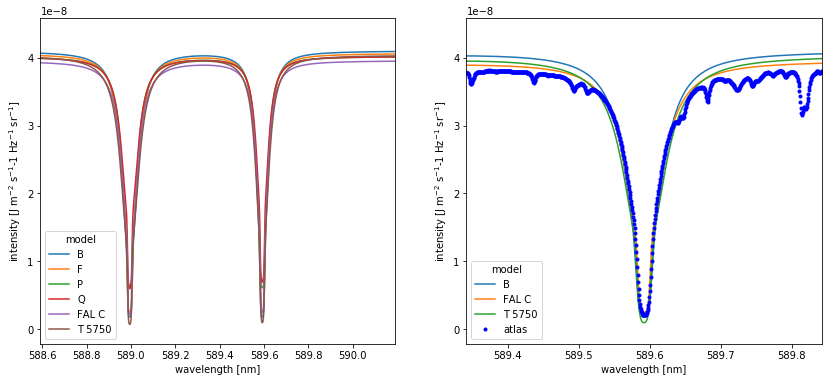

In [16]:
plt.figure(figsize=[14, 6])

lambda0 = mdl_B.atoms[2].transition[0].lambda0
NaD_obs = fts.nmsiatlas(lambda0-2.0, lambda0+2.0)

plt.subplot(121)
plt.plot(mdl_B.spectrum.waves, mdl_B.rays[0].I, label='B')
plt.plot(mdl_F.spectrum.waves, mdl_F.rays[0].I, label='F')
plt.plot(mdl_P.spectrum.waves, mdl_P.rays[0].I, label='P')
plt.plot(mdl_Q.spectrum.waves, mdl_Q.rays[0].I, label='Q')
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(kur_5750.spectrum.waves, kur_5750.rays[0].I, label='T 5750')

plt.xlim([lambda0-1.0, lambda0+0.6])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')

plt.legend(title='model')

plt.subplot(122)
plt.plot(mdl_B.spectrum.waves, mdl_B.rays[0].I, label='B')
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(kur_5750.spectrum.waves, kur_5750.rays[0].I, label='T 5750')
plt.plot(NaD_obs[0], NaD_obs[1], "b.", label='atlas')

plt.xlim([lambda0-0.25, lambda0+0.25])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')
plt.legend(title='model')
plt.show()

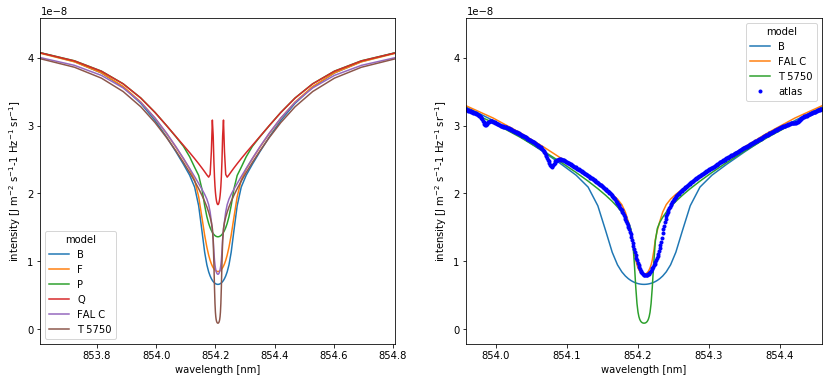

In [17]:
plt.figure(figsize=[14, 6])

lambda0 = mdl_B.atoms[0].transition[4].lambda0
Ca8542_obs = fts.nmsiatlas(lambda0-2.0, lambda0+2.0)

plt.subplot(121)
plt.plot(mdl_B.spectrum.waves, mdl_B.rays[0].I, label='B')
plt.plot(mdl_F.spectrum.waves, mdl_F.rays[0].I, label='F')
plt.plot(mdl_P.spectrum.waves, mdl_P.rays[0].I, label='P')
plt.plot(mdl_Q.spectrum.waves, mdl_Q.rays[0].I, label='Q')
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(kur_5750.spectrum.waves, kur_5750.rays[0].I, label='T 5750')

plt.xlim([lambda0-0.6, lambda0+0.6])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')

plt.legend(title='model')

plt.subplot(122)
plt.plot(mdl_B.spectrum.waves, mdl_B.rays[0].I, label='B')
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(kur_5750.spectrum.waves, kur_5750.rays[0].I, label='T 5750')
plt.plot(Ca8542_obs[0], Ca8542_obs[1], "b.", label='atlas')

plt.xlim([lambda0-0.25, lambda0+0.25])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')
plt.legend(title='model')
plt.show()

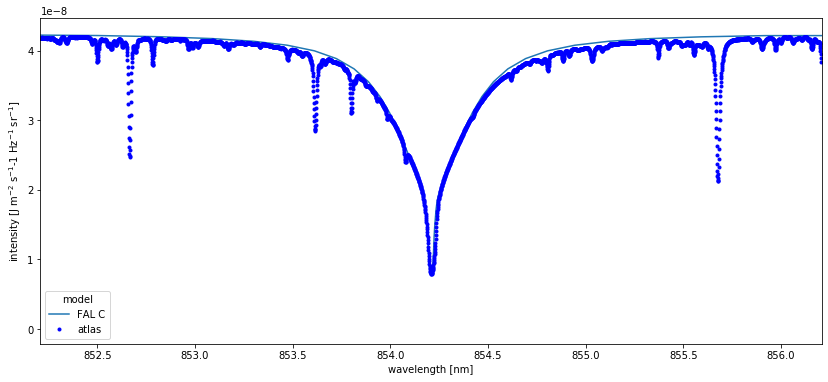

In [18]:
plt.figure(figsize=[14, 6])
plt.plot(fal_C.spectrum.waves, fal_C.rays[0].I, label='FAL C')
plt.plot(Ca8542_obs[0], Ca8542_obs[1], "b.", label='atlas')

plt.xlim([lambda0-2.0, lambda0+2.0])
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')
plt.legend(title='model')
plt.show()